In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import albumentations as A
import cv2
from albumentations.pytorch import ToTensorV2

In [2]:
path = Path.home() / 'OneDrive - Seagroup/ai/computer_vison/shopee_price_matching/shopee_ds/images'
files = [str(file) for file in path.glob("*.jpg")]

In [3]:
def read_image(file):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


image_size = 256
randcrop_big = A.RandomResizedCrop(image_size, image_size, scale=(0.5, 1.0))
randcrop_small = A.RandomResizedCrop(image_size, image_size)

In [12]:
image = cv2.imread(files[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resize = A.Compose([
    A.Resize(image_size, image_size),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    # ToTensorV2(p=1.0),
])

resize(image=image)

{'image': array([[[ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         ...,
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064]],
 
        [[ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         ...,
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064]],
 
        [[ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033,  2.099695 ],
         ...,
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064],
         [-1.6555356, -1.8256301, -1.5430064]],
 
        ...,
 
        [[ 2.1804092,  2.0084033,  2.099695 ],
         [ 2.1804092,  2.0084033

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


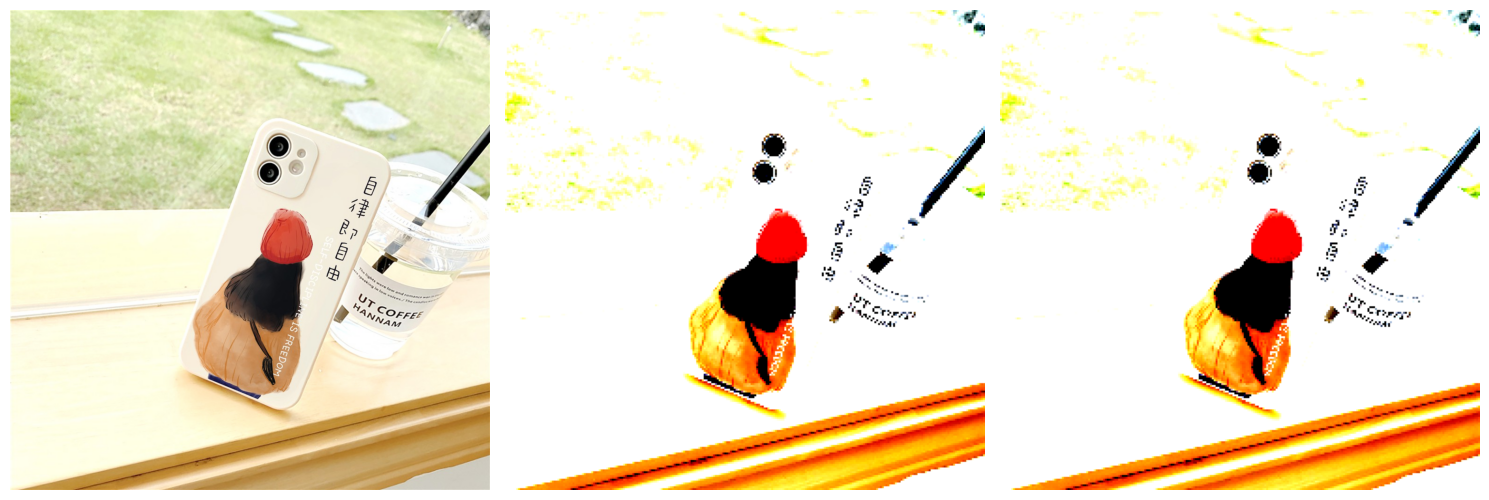

In [13]:
num_image = 35
image = cv2.imread(files[num_image])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
img = [
    image,
    resize(image=image)['image'],
    resize(image=image)['image'],
]
for ax, v in zip(axes, img):
    ax.imshow(v)
    ax.axis('off')
fig.tight_layout()